In [1]:
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import math

In [2]:
fits_file = 'https://mast.stsci.edu/api/v0.1/Download/file?uri=mast:TESS/product/tess2021232031932-s0042-0000000069813909-0213-s_lc.fits'



In [29]:
fits.info(fits_file)

Filename: /Users/rebsters/.astropy/cache/download/url/26efea1cfb2a3f936e420f100b9c5079/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   18342R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


In [30]:
fits.getdata(fits_file, ext=1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

In [3]:
with fits.open(fits_file, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
pdcsap_fluxes_nonan = np.array([]) 
tess_bjds_nonan = np.array([]) 
for i in range(len(pdcsap_fluxes)):
    if (not math.isnan(pdcsap_fluxes[i])):
        pdcsap_fluxes_nonan = np.append(pdcsap_fluxes_nonan, [pdcsap_fluxes[i]])
        tess_bjds_nonan = np.append(tess_bjds_nonan, [tess_bjds[i]])

In [4]:
2*np.pi/1.00014424

6.282279151234812

In [10]:
def sin(x, a, b, c):
    return a * np.sin(b * x)+c
params, params_covariance = optimize.curve_fit(sin, tess_bjds_nonan, pdcsap_fluxes_nonan)

print(params)
std_dev = np.sqrt(np.diag(params_covariance))  # Standard deviation from the covariance matrix
print(std_dev)

import numpy as np

w = 1.000144240
delta_w = 0.00020747

T = 2 * np.pi / w
partial_T_w = -2 * np.pi / (w ** 2)

delta_T = abs(partial_T_w * delta_w)
print(f"The standard deviation of T is approximately: {delta_T}")

[-2.22046355e-01  1.00014424e+00  4.67074268e+02]
[0.09934865 0.00020747 0.07807981]
The standard deviation of T is approximately: 0.0013031964824460583


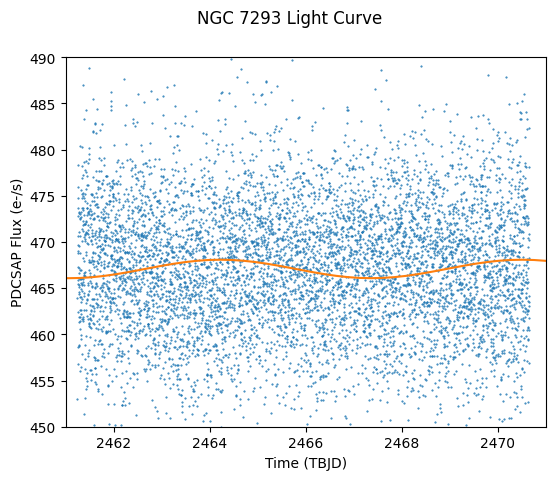

In [6]:
# Define the epoch of primary transit in TBJD.  Our timestamps are also already in TBJD.
#t0 = 2037.895
t0 = 2466

# Start figure and axis.
fig, ax = plt.subplots()

# Plot the timeseries in black circles.
ax.plot(tess_bjds_nonan, pdcsap_fluxes_nonan, 'o', markersize = '0.5')

# Center the x-axis on where we expect a transit to be (time = T0), and set
# the x-axis range within +/- 1 day of T0.
ax.set_xlim(t0 - 5, t0 + 5)
ax.set_ylim(450, 490)

# Let's label the axes and define a title for the figure.
fig.suptitle("NGC 7293 Light Curve")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")

ax.plot(np.linspace(2447, 2471, 100), sin(np.linspace(2447, 2471, 100), 1, params[1], params[2]))
# Adjust the left margin so the y-axis label shows up.
plt.subplots_adjust(left=0.15)
plt.show()

In [34]:
with fits.open(fits_file, mode="readonly") as hdulist:
    aperture = hdulist[2].data

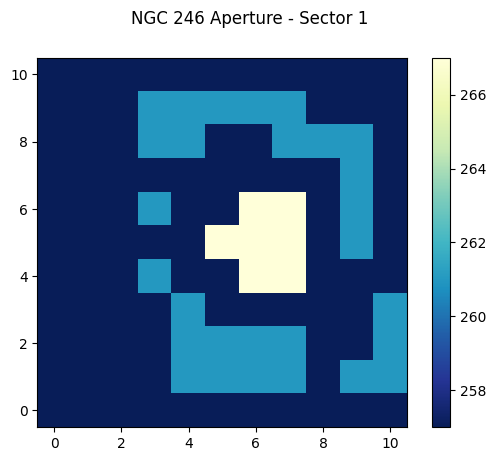

In [35]:
# Start figure and axis.
fig, ax = plt.subplots()

# Display the pixels as an image.
cax = ax.imshow(aperture, cmap=plt.cm.YlGnBu_r, origin="lower")

# Add a color bar.
cbar = fig.colorbar(cax)

# Add a title to the plot.
fig.suptitle("NGC 246 Aperture - Sector 1")
plt.show()